세상의 모든 관계를 직선으로만 표현할 수는 없다. 

회귀가 **독립변수의 단항식이 아닌 2차, 3차 방정식**과 같은 다항식으로 표현되는 것을 다항(Polynomial)회귀라고 한다.

주의할 점 

다항회귀를 비선형회귀와 혼동하기 쉽지만, 

**회귀에서 선형/비선형 회귀를 나누는 기준은 회귀계수**가 선형 비선형에 따른 것이지 독립변수가 선형/비선형 여부와는 무관 

### 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 

대신, 다항 회귀가 선형회귀이기 때문에, 비성형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. 

이를 위해 사이킷런은 **PolynomialFeatures** 클래스를 통해 피처를 Polynomial 피처로 변환한다.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression

#다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

#degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 반환 
poly= PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [7]:
def polynomial_func(X):
    y = 1 + 2 *X[:,0] + 3 *X[:,0]**2 + 4 *X[:,1] ** 3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 features : \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 features : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [8]:
#3차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature : \n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인 
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 : \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : \n', model.coef_.shape)

3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 : 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : 
 (10,)


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3* X[:, 0]**2 + 4*X[:, 1]**3
    return y

#Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression을 연결 
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X=np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환 .
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터 
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다. 
Degree 1 MSE는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다. 
Degree 4 MSE는 0.04320874987231741 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899340e+05 -1.87416086e+06  2.03716240e+07
 -1.44873341e+08  7.09315840e+08 -2.47066022e+09  6.24561781e+09
 -1.15676672e+10  1.56895187e+10 -1.54006300e+10  1.06457475e+10
 -4.91378589e+09  1.35919961e+09 -1.70381209e+08] 입니다. 
Degree 15 MSE는 182594790.078965 입니다.


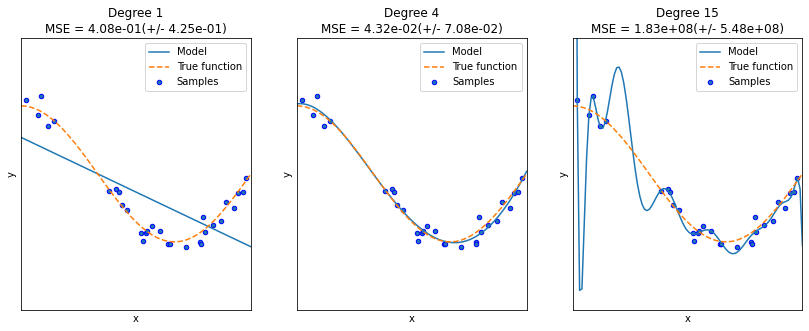

In [14]:
plt.figure(figsize = (14,5))
degrees = [1,4,15]

#다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    #개별 degree 별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    #교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = 10)
    #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀 계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다. '.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1));plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()